In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.32 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (11941/11941), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.9 MB/s e

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import torch
import cv2
import os
from tqdm import tqdm

# === Load YOLOv5 model ===
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.classes = [0]  # Chỉ nhận diện người (class 0 trong COCO dataset)

# === Đường dẫn video và thư mục lưu video đầu ra ===
video_path = '/kaggle/input/baminton/badminton2.mp4'  # Đường dẫn video gốc
output_video_path = 'output_video.mp4'  # Đường dẫn video sau khi xử lý

# === Đọc video ===
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# === Thiết lập để lưu video đầu ra ===
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Định dạng codec cho video .mp4
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (frame_width, frame_height))

# === Lặp qua từng frame và nhận diện người ===
for _ in tqdm(range(frame_count), desc="Processing frames"):
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Dùng YOLOv5 nhận diện người
    results = model(frame)
    boxes = results.xyxy[0].cpu().numpy()  # Lấy tọa độ bounding boxes của người

    # Step 2: Lọc và chỉ lấy 2 bounding box lớn nhất
    if len(boxes) > 0:
        # Sắp xếp bounding boxes theo diện tích (diện tích = (x2 - x1) * (y2 - y1))
        boxes = sorted(boxes, key=lambda b: (b[2] - b[0]) * (b[3] - b[1]), reverse=True)[:2]
        
        # Step 3: Vẽ bounding box quanh 2 người chơi chính
        for box in boxes:
            x1, y1, x2, y2, conf, cls = box
            if conf > 0.5:  # Chỉ vẽ nếu độ tin cậy > 50%
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    
    # Step 4: Lưu frame đã vẽ bounding box vào video đầu ra
    out.write(frame)

cap.release()
out.release()
print(f"Video đã được lưu tại: {output_video_path}")


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-5-7 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 140MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Processing frames: 100%|█████████▉| 30393/30397 [09:43<00:00, 52.05it/s]

Video đã được lưu tại: output_video.mp4


In [2]:
!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.7 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.26.1 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0

In [3]:
import cv2
import mediapipe as mp
import pandas as pd

# MediaPipe khởi tạo
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Đường dẫn file
input_path = '/kaggle/input/baminton/output_video.mp4'  # Thay bằng thư mục bạn đã upload
output_video_path = '/kaggle/working/foot_landmarks_video.mp4'
output_csv_path = '/kaggle/working/foot_positions.csv'

# Mở video
cap = cv2.VideoCapture(input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Ghi video đầu ra
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Data cho CSV
all_data = []
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(img_rgb)

    landmarks_list = []

    if results.pose_landmarks:
        # Trong video có sẵn 2 người, giả định MediaPipe detect được cả 2.
        # Nếu không, cần dùng YOLO để detect bbox và chạy pose từng người riêng.

        # Giả định MediaPipe chỉ trả về 1 người => bạn cần tự thêm bước detect 2 người nếu cần thiết
        # Ở đây tạm coi bạn đã có logic để có danh sách 2 người trong landmarks_list
        # Tạm thời chỉ xử lý 1 người: bạn có thể mở rộng sau
        landmarks = results.pose_landmarks.landmark

        # Lấy gót chân trái/phải
        left_heel = landmarks[mp_pose.PoseLandmark.LEFT_HEEL]
        right_heel = landmarks[mp_pose.PoseLandmark.RIGHT_HEEL]

        l_heel = (int(left_heel.x * width), int(left_heel.y * height))
        r_heel = (int(right_heel.x * width), int(right_heel.y * height))

        landmarks_list.append({'left_heel': l_heel, 'right_heel': r_heel})

    # Gán player1, player2 theo vị trí trái/phải
    def get_avg_x(lm):  # trung bình x để biết bên trái hay phải
        return (lm['left_heel'][0] + lm['right_heel'][0]) / 2

    sorted_players = sorted(landmarks_list, key=get_avg_x)

    for i, player in enumerate(sorted_players):
        player_id = f'player{i+1}'

        lx, ly = player['left_heel']
        rx, ry = player['right_heel']

        # Vẽ lên khung hình
        cv2.circle(frame, (lx, ly), 8, (255, 0, 0), -1)
        cv2.circle(frame, (rx, ry), 8, (0, 255, 0), -1)
        cv2.putText(frame, player_id, (int((lx+rx)/2), int((ly+ry)/2)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

        all_data.append({
            'frame': frame_idx,
            'player': player_id,
            'left_heel_x': lx,
            'left_heel_y': ly,
            'right_heel_x': rx,
            'right_heel_y': ry
        })

    out.write(frame)
    frame_idx += 1

# Lưu CSV
df = pd.DataFrame(all_data)
df.to_csv(output_csv_path, index=False)

# Đóng video
cap.release()
out.release()
pose.close()


2025-05-08 01:11:36.355763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746666696.585721      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746666696.651384      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1746666707.783287     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746666707.849444     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:17466

In [4]:
# Góc sân trong hình (pixel)
import numpy as np
image_pts = np.array([
    [281, 381],  # Top-left
    [919, 381],  # Top-right
    [63, 759],  # Bottom-left
    [1311, 759], # Bottom-right
], dtype=np.float32)


In [5]:
court_pts = np.array([
    [0, 0],
    [610, 0],
    [0, 1340],
    [610, 1340],
], dtype=np.float32)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Load dữ liệu CSV từ bước trước
df = pd.read_csv('/kaggle/input/baminton/foot_positions.csv')

# Các điểm homography: image (pixel) -> court (cm)
image_pts = np.array([
    [281, 381],  # Top-left
    [919, 381],  # Top-right
    [63, 759],  # Bottom-left
    [1311, 759], # Bottom-right
], dtype=np.float32)
court_pts = np.array([[0, 0], [610, 0], [0, 1340], [610, 1340]], dtype=np.float32)

H, _ = cv2.findHomography(image_pts, court_pts)

def apply_homography(x, y):
    pts = np.array([[x, y]], dtype='float32')
    pts = np.array([pts])
    dst = cv2.perspectiveTransform(pts, H)
    return dst[0][0]

# Tính vị trí trung bình gót chân → chuyển đổi
df['foot_x'] = (df['left_heel_x'] + df['right_heel_x']) / 2
df['foot_y'] = (df['left_heel_y'] + df['right_heel_y']) / 2

court_coords = df[['foot_x', 'foot_y']].apply(lambda row: apply_homography(row['foot_x'], row['foot_y']), axis=1)
df[['court_x', 'court_y']] = pd.DataFrame(court_coords.tolist(), index=df.index)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


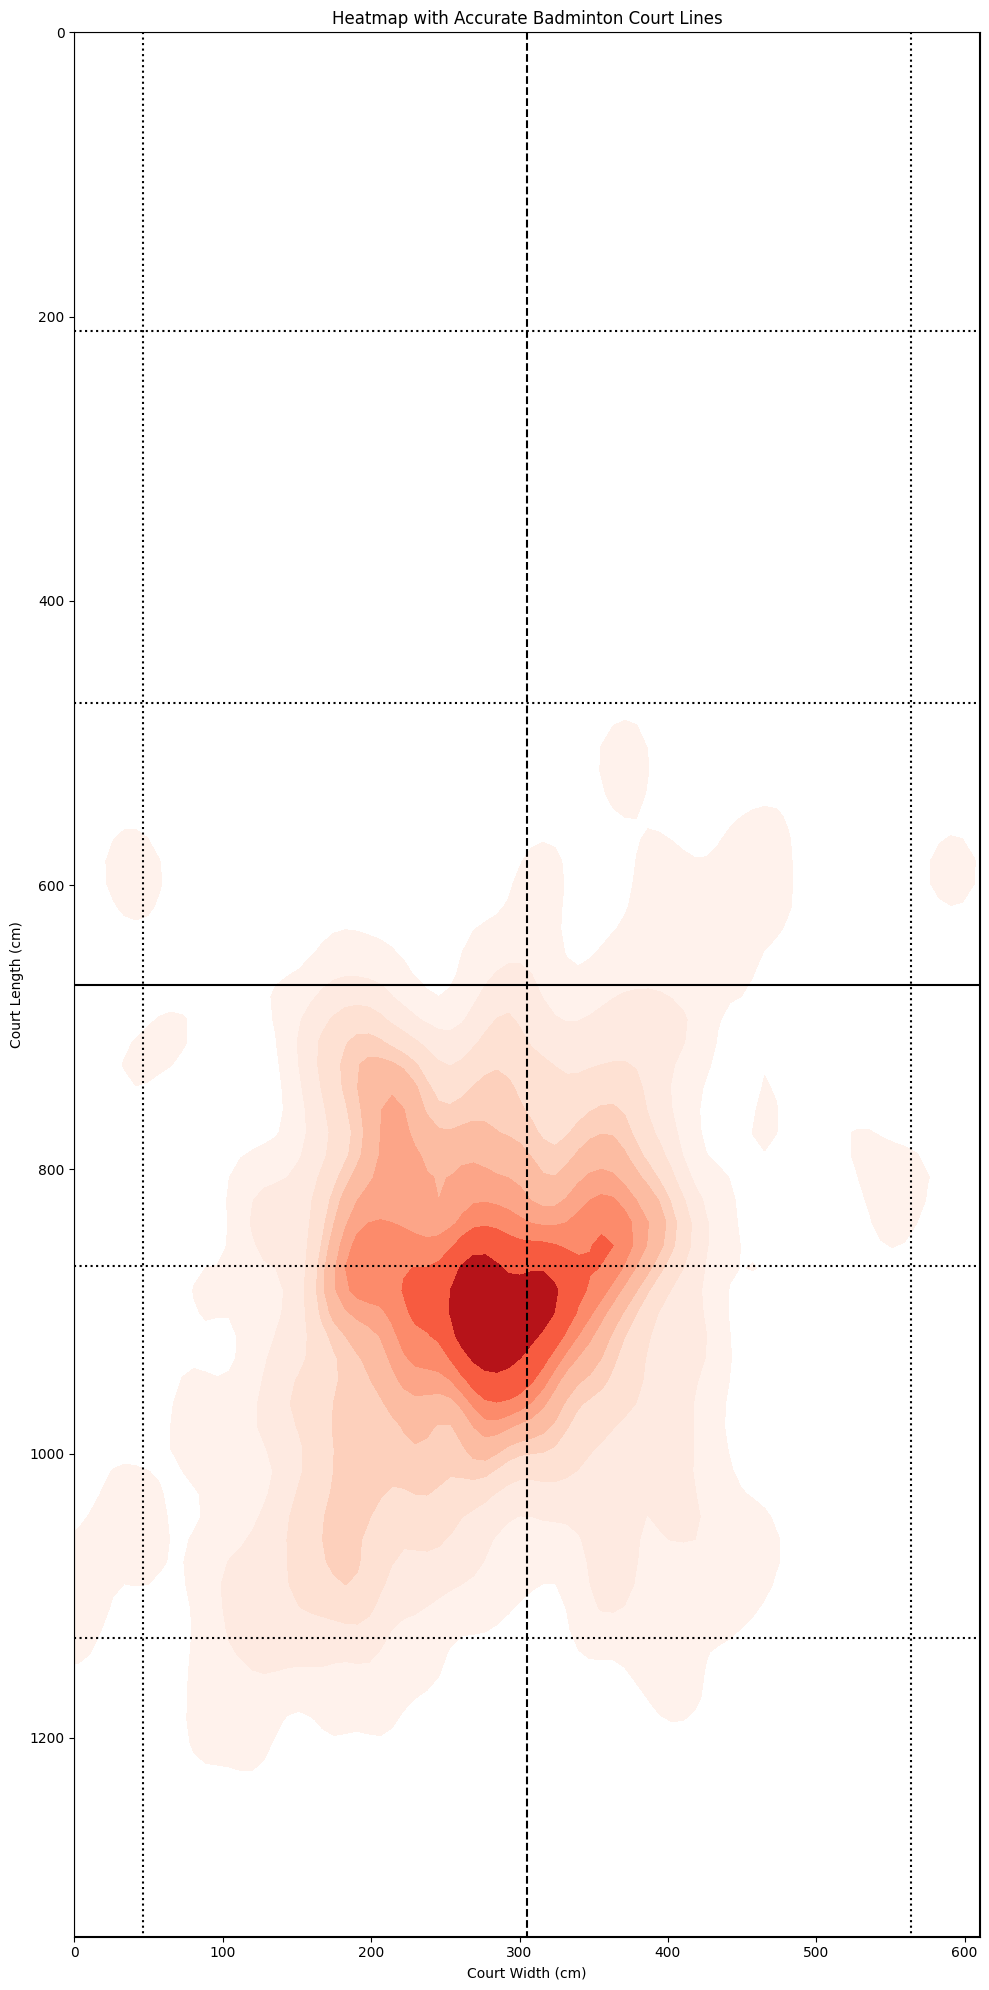

In [15]:
plt.figure(figsize=(10, 20))

# Vẽ heatmap
sns.kdeplot(
    data=df, x='court_x', y='court_y',
    fill=True, cmap='Reds', bw_adjust=0.6, thresh=0.1
)


# Vẽ các đường sân cầu lông
court_w = 610
court_l = 1340

# Đường bao sân (đánh đôi)
plt.plot([0, court_w], [0, 0], 'k')  # biên ngang dưới
plt.plot([0, court_w], [court_l, court_l], 'k')  # biên ngang trên
plt.plot([0, 0], [0, court_l], 'k')  # biên dọc trái
plt.plot([court_w, court_w], [0, court_l], 'k')  # biên dọc phải

# Vạch giữa sân (từ lưới)
center_x = court_w / 2
plt.plot([center_x, center_x], [0, court_l], 'k', linestyle='--')

# Lưới ở giữa sân
net_y = court_l / 2
plt.plot([0, court_w], [net_y, net_y], 'k')

# Đường phát cầu ngắn (cách lưới 198 cm mỗi bên)
plt.plot([0, court_w], [net_y - 198, net_y - 198], 'k', linestyle=':')
plt.plot([0, court_w], [net_y + 198, net_y + 198], 'k', linestyle=':')

# Đường phát cầu dài cho đôi (cách biên ngang 210 cm mỗi bên)
plt.plot([0, court_w], [court_l - 210, court_l - 210], 'k', linestyle=':')
plt.plot([0, court_w], [210, 210], 'k', linestyle=':')

# Biên đơn (chỉ cần nếu bạn phân biệt đánh đơn và đôi)
single_sideline_left = (court_w - 518) / 2
single_sideline_right = court_w - single_sideline_left
plt.plot([single_sideline_left, single_sideline_left], [0, court_l], 'k', linestyle=':')
plt.plot([single_sideline_right, single_sideline_right], [0, court_l], 'k', linestyle=':')

# Hiển thị
plt.title('Heatmap with Accurate Badminton Court Lines')
plt.xlim(0, court_w)
plt.ylim(0, court_l)
plt.gca().invert_yaxis()
plt.xlabel('Court Width (cm)')
plt.ylabel('Court Length (cm)')
plt.tight_layout()
plt.savefig('/kaggle/working/heatmap_with_real_court.png', dpi=300)
plt.show()
